In [4]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [5]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

le = pd.read_sql_query('select * from lifeexpectancy',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [6]:
# Description and context of the Life Expectancy (WHO) dataset can be found here.
  ## https://www.kaggle.com/kumarajarshi/life-expectancy-who

Our goal in this challenge is to find the factors that affect the life expectancy. So, the target variable is Life_Expectancy. First we start with data cleaning by detecting and removing null-values and treating outliers. Then we move to Data Exploration and Feature Engineering. Do not forget that the target variable in our scenario is <b>"Life_Expectancy"</b>.

<b>Data Cleaning:</b>

In [8]:
# Renaming some column names as they contain trailing spaces.
le.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)


In [10]:
# Verify descriptive statistics
le.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [11]:
# Verifying whether data for each variable is according to its dataype or not.
le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                     2938 non-null object
Year                        2938 non-null int64
Status                      2938 non-null object
Life_Expectancy             2928 non-null float64
Adult_Mortality             2928 non-null float64
Infant_Deaths               2938 non-null int64
Alcohol                     2744 non-null float64
Percentage_Exp              2938 non-null float64
HepatitisB                  2385 non-null float64
Measles                     2938 non-null int64
BMI                         2904 non-null float64
Under_Five_Deaths           2938 non-null int64
Polio                       2919 non-null float64
Tot_Exp                     2712 non-null float64
Diphtheria                  2919 non-null float64
HIV/AIDS                    2938 non-null float64
GDP                         2490 non-null float64
Population                  2286 non-null float64
thi

Yes, the data looks correct w.r.t the dataypes.

In [13]:
# Identify percentage of null values in each column.
le.isnull().sum()*100/le.isnull().count()

Country                      0.000000
Year                         0.000000
Status                       0.000000
Life_Expectancy              0.340368
Adult_Mortality              0.340368
Infant_Deaths                0.000000
Alcohol                      6.603131
Percentage_Exp               0.000000
HepatitisB                  18.822328
Measles                      0.000000
BMI                          1.157250
Under_Five_Deaths            0.000000
Polio                        0.646698
Tot_Exp                      7.692308
Diphtheria                   0.646698
HIV/AIDS                     0.000000
GDP                         15.248468
Population                  22.191967
thinness_1to19_years         1.157250
thinness_5to9_years          1.157250
Income_Comp_Of_Resources     5.684139
Schooling                    5.547992
dtype: float64

In [14]:
country_list = le.Country.unique()
fill_list = ['Life_Expectancy','Adult_Mortality','Alcohol','HepatitisB','BMI','Polio','Tot_Exp','Diphtheria','GDP','Population','thinness_1to19_years','thinness_5to9_years','Income_Comp_Of_Resources','Schooling']


<b>Remove null values using interpolate()

In [15]:
# Treat null values using interpolation.
for country in country_list:
    le.loc[le['Country'] == country,fill_list] = le.loc[le['Country'] == country,fill_list].interpolate()
    
# Drop remaining null values after interpolation.
le.dropna(inplace=True)

In [16]:
# Verifying null-values after applying above methods.
le.isnull().sum()

Country                     0
Year                        0
Status                      0
Life_Expectancy             0
Adult_Mortality             0
Infant_Deaths               0
Alcohol                     0
Percentage_Exp              0
HepatitisB                  0
Measles                     0
BMI                         0
Under_Five_Deaths           0
Polio                       0
Tot_Exp                     0
Diphtheria                  0
HIV/AIDS                    0
GDP                         0
Population                  0
thinness_1to19_years        0
thinness_5to9_years         0
Income_Comp_Of_Resources    0
Schooling                   0
dtype: int64

<b>Note: Used interpolation to fill missing values since our data set is a time series one.

<b>Detecting Outliers for each variable.

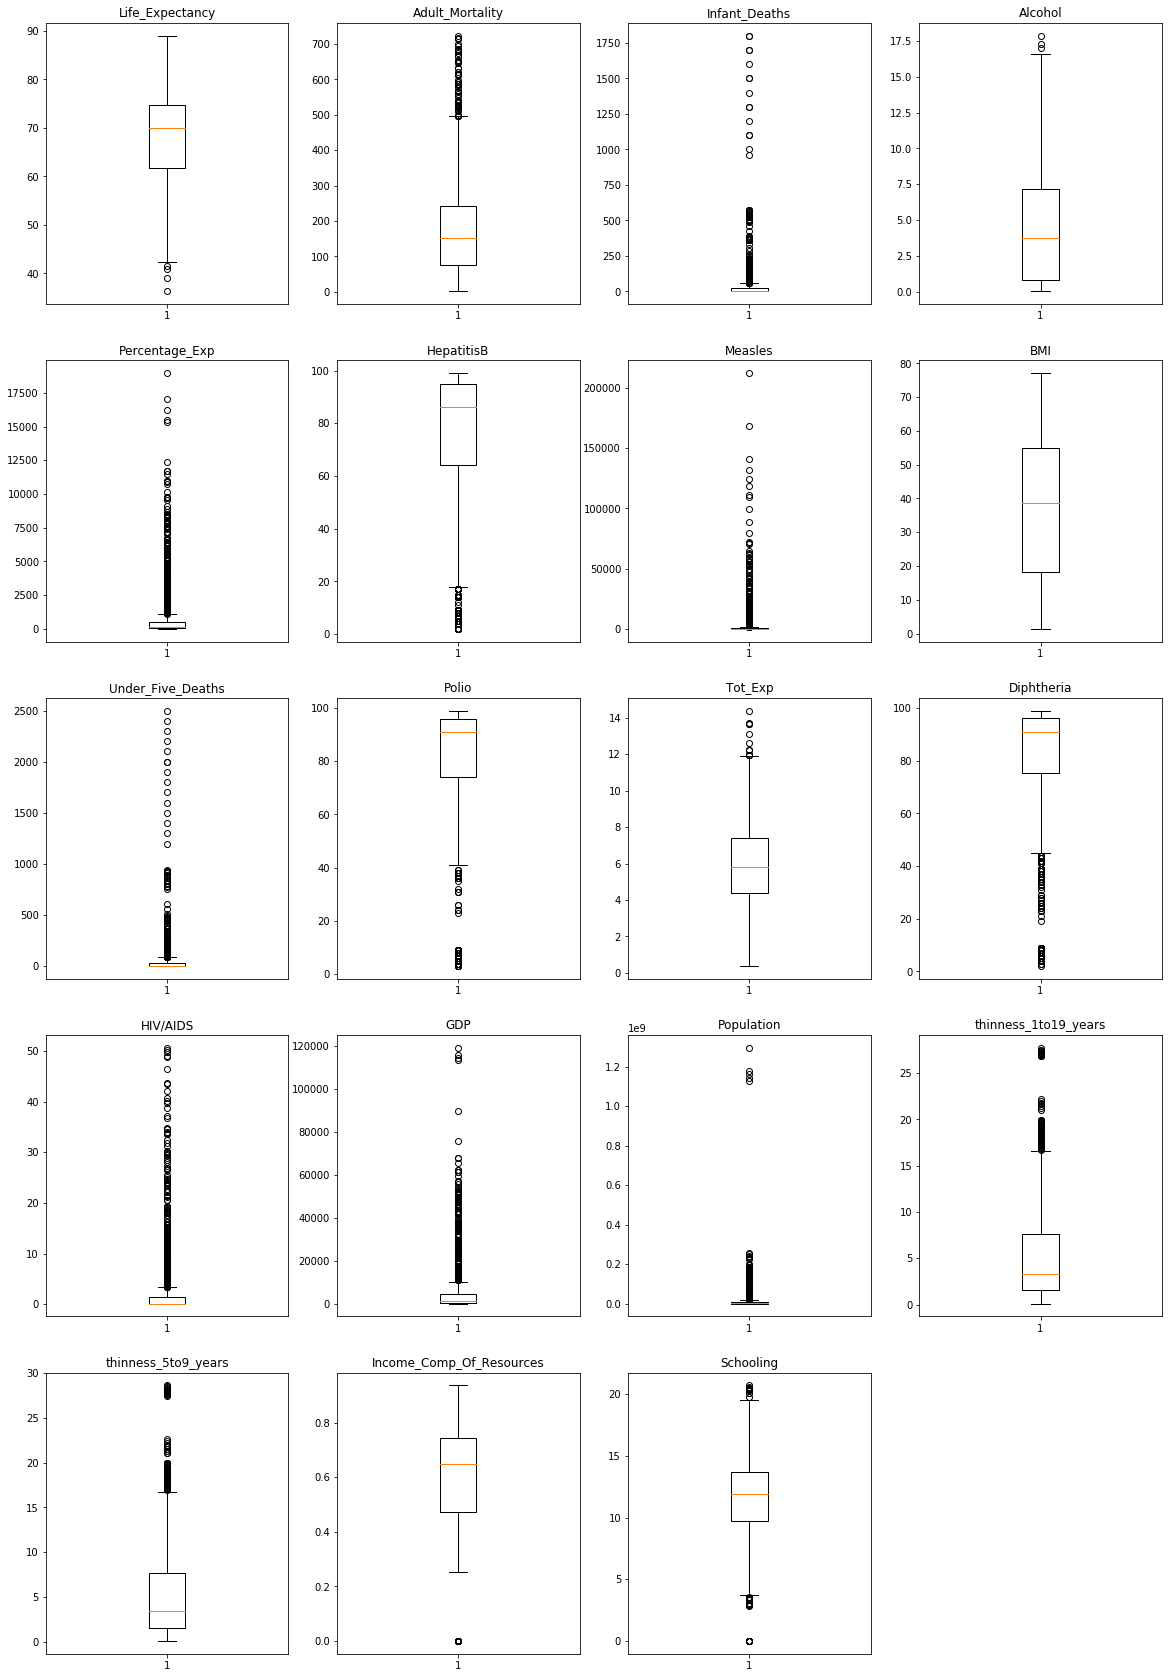

In [17]:
# Create a dictionary of columns.
col_dict = {'Life_Expectancy':1,'Adult_Mortality':2,'Infant_Deaths':3,'Alcohol':4,'Percentage_Exp':5,'HepatitisB':6,'Measles':7,'BMI':8,'Under_Five_Deaths':9,'Polio':10,'Tot_Exp':11,'Diphtheria':12,'HIV/AIDS':13,'GDP':14,'Population':15,'thinness_1to19_years':16,'thinness_5to9_years':17,'Income_Comp_Of_Resources':18,'Schooling':19}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(le[variable],whis=1.5)
                     plt.title(variable)

plt.show()

In [18]:
# Calculate number of outliers and its percentage in each variable using Tukey's method.

for variable in col_dict.keys():
    q75, q25 = np.percentile(le[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(variable,
                                                                             len((np.where((le[variable] > max_val) | 
                                                                                           (le[variable] < min_val))[0])),len((np.where((le[variable] > max_val) | 
                                                                                           (le[variable] < min_val))[0]))*100/1987))

Number of outliers and percentage of it in Life_Expectancy : 4 and 0.20130850528434827
Number of outliers and percentage of it in Adult_Mortality : 58 and 2.9189733266230498
Number of outliers and percentage of it in Infant_Deaths : 198 and 9.96477101157524
Number of outliers and percentage of it in Alcohol : 3 and 0.1509813789632612
Number of outliers and percentage of it in Percentage_Exp : 232 and 11.675893306492199
Number of outliers and percentage of it in HepatitisB : 216 and 10.870659285354806
Number of outliers and percentage of it in Measles : 361 and 18.16809260191243
Number of outliers and percentage of it in BMI : 0 and 0.0
Number of outliers and percentage of it in Under_Five_Deaths : 227 and 11.424257674886764
Number of outliers and percentage of it in Polio : 159 and 8.002013085052843
Number of outliers and percentage of it in Tot_Exp : 13 and 0.6542526421741318
Number of outliers and percentage of it in Diphtheria : 195 and 9.813789632611979
Number of outliers and perce

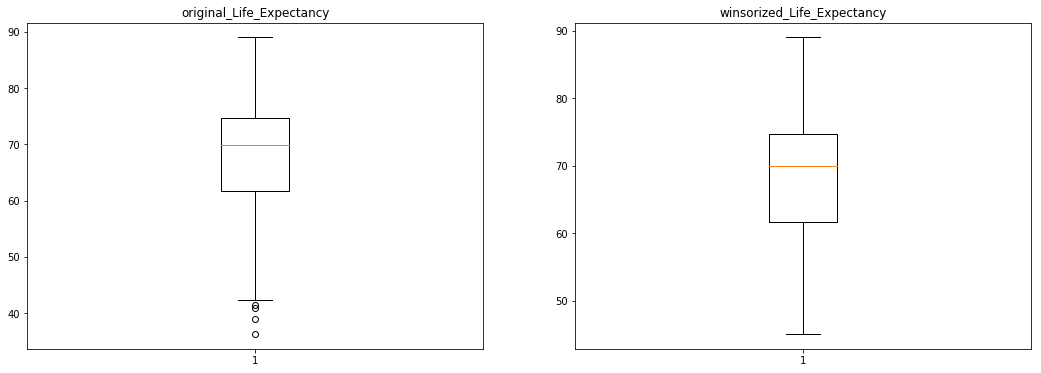

In [19]:
# Removing Outliers in the variables using Winsorization technique.
# Winsorize Life_Expectancy
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Life_Expectancy = le['Life_Expectancy']
plt.boxplot(original_Life_Expectancy)
plt.title("original_Life_Expectancy")

plt.subplot(1,2,2)
winsorized_Life_Expectancy = winsorize(le['Life_Expectancy'],(0.01,0))
plt.boxplot(winsorized_Life_Expectancy)
plt.title("winsorized_Life_Expectancy")

plt.show()

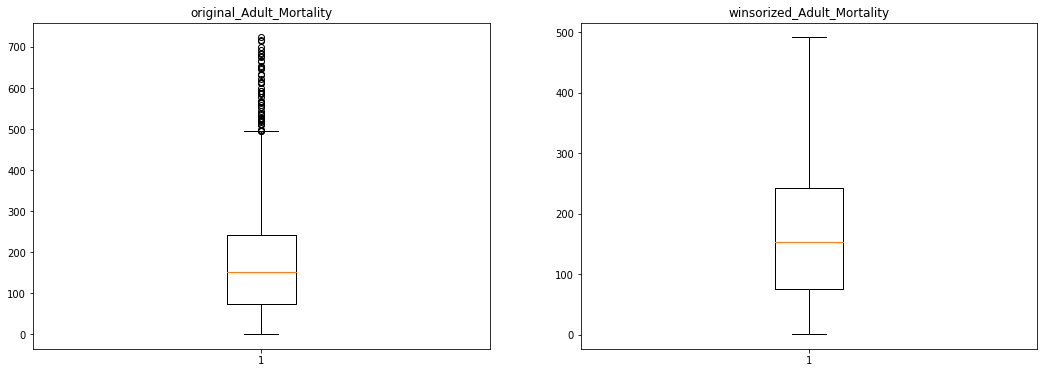

In [20]:
# Winsorize Adult_Mortality
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Adult_Mortality = le['Adult_Mortality']
plt.boxplot(original_Adult_Mortality)
plt.title("original_Adult_Mortality")

plt.subplot(1,2,2)
winsorized_Adult_Mortality = winsorize(le['Adult_Mortality'],(0,0.03))
plt.boxplot(winsorized_Adult_Mortality)
plt.title("winsorized_Adult_Mortality")

plt.show()

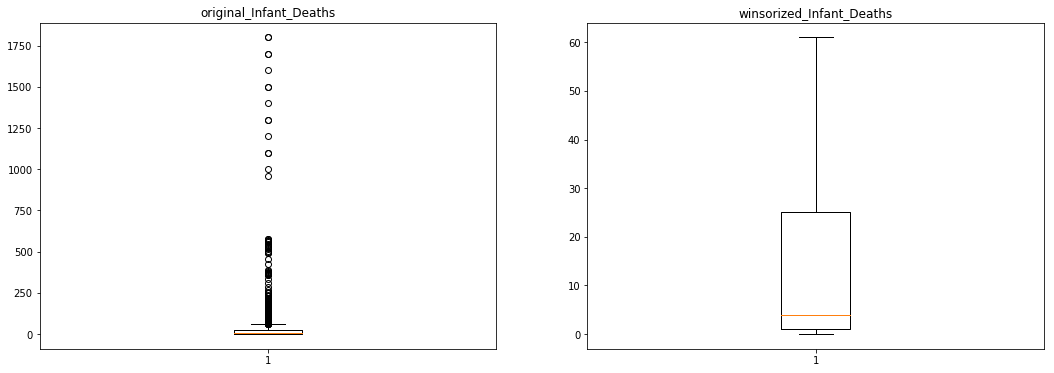

In [21]:
# Winsorize Infant_Deaths
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Infant_Deaths = le['Infant_Deaths']
plt.boxplot(original_Infant_Deaths)
plt.title("original_Infant_Deaths")

plt.subplot(1,2,2)
winsorized_Infant_Deaths = winsorize(le['Infant_Deaths'],(0,0.10))
plt.boxplot(winsorized_Infant_Deaths)
plt.title("winsorized_Infant_Deaths")

plt.show()

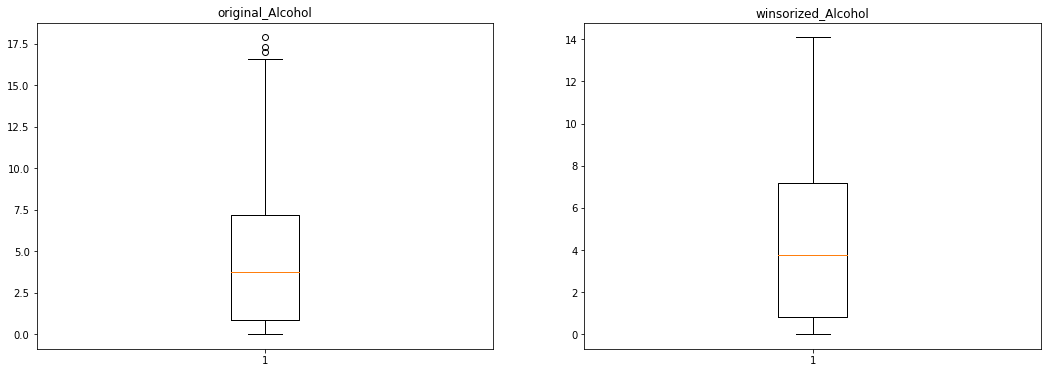

In [22]:
# Winsorize Alcohol
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Alcohol = le['Alcohol']
plt.boxplot(original_Alcohol)
plt.title("original_Alcohol")

plt.subplot(1,2,2)
winsorized_Alcohol = winsorize(le['Alcohol'],(0,0.01))
plt.boxplot(winsorized_Alcohol)
plt.title("winsorized_Alcohol")

plt.show()

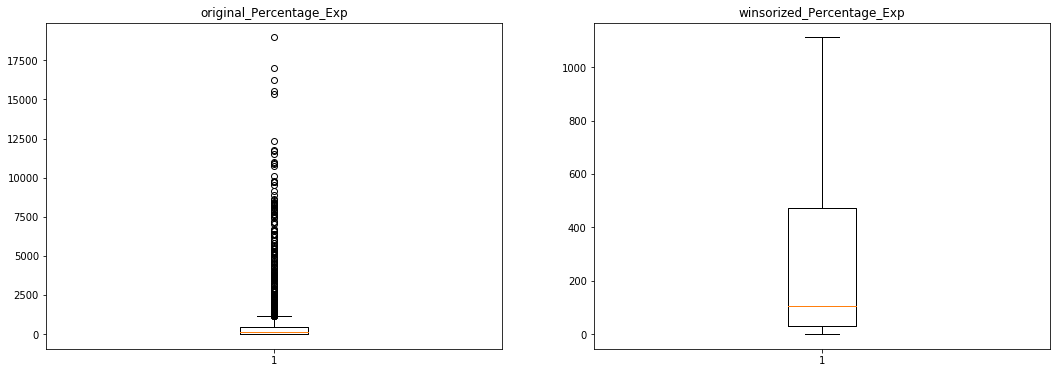

In [23]:
# Winsorize Percentage_Exp
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Percentage_Exp = le['Percentage_Exp']
plt.boxplot(original_Percentage_Exp)
plt.title("original_Percentage_Exp")

plt.subplot(1,2,2)
winsorized_Percentage_Exp = winsorize(le['Percentage_Exp'],(0,0.12))
plt.boxplot(winsorized_Percentage_Exp)
plt.title("winsorized_Percentage_Exp")

plt.show()

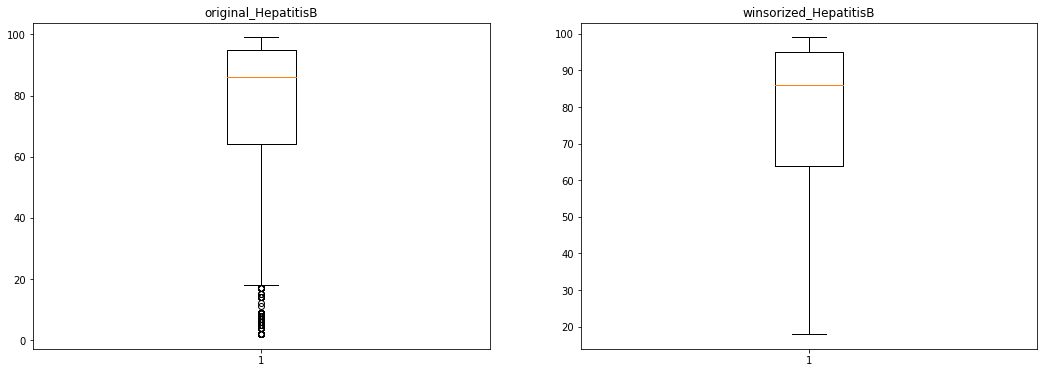

In [24]:
# Winsorize HepatitisB
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HepatitisB = le['HepatitisB']
plt.boxplot(original_HepatitisB)
plt.title("original_HepatitisB")

plt.subplot(1,2,2)
winsorized_HepatitisB = winsorize(le['HepatitisB'],(0.11,0))
plt.boxplot(winsorized_HepatitisB)
plt.title("winsorized_HepatitisB")

plt.show()

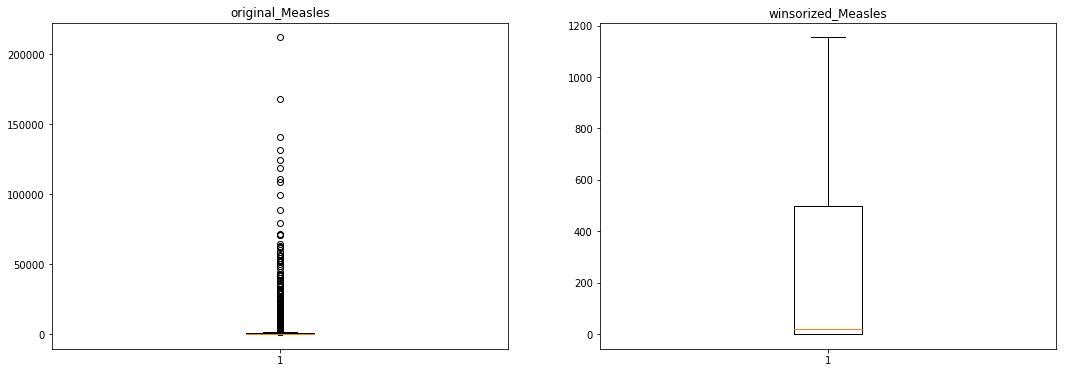

In [25]:
# Winsorize Measles
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Measles = le['Measles']
plt.boxplot(original_Measles)
plt.title("original_Measles")

plt.subplot(1,2,2)
winsorized_Measles = winsorize(le['Measles'],(0,0.19))
plt.boxplot(winsorized_Measles)
plt.title("winsorized_Measles")

plt.show()

Add a new column which adds indicator on the effect of Measles column.

<b>Winsorization changes 19% of the data, which may not give better results. Hence drop this column.

In [26]:
le = le.drop('Measles',axis=1)

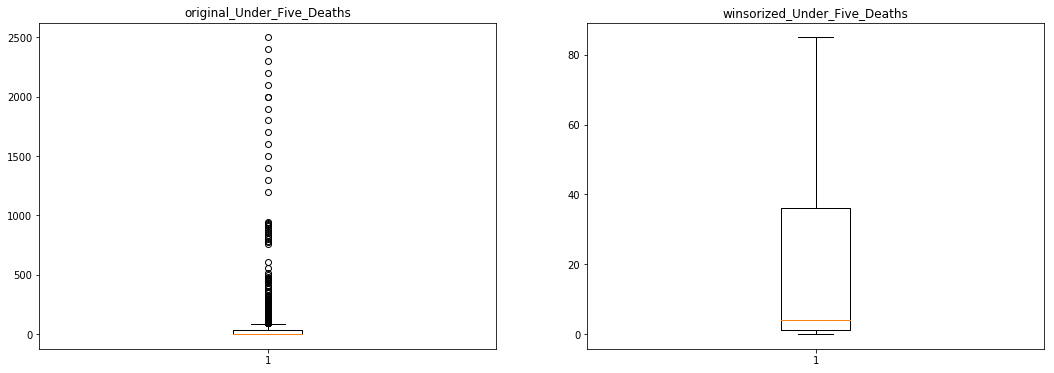

In [27]:
# Winsorize Under_Five_Deaths
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Under_Five_Deaths = le['Under_Five_Deaths']
plt.boxplot(original_Under_Five_Deaths)
plt.title("original_Under_Five_Deaths")

plt.subplot(1,2,2)
winsorized_Under_Five_Deaths = winsorize(le['Under_Five_Deaths'],(0,0.12))
plt.boxplot(winsorized_Under_Five_Deaths)
plt.title("winsorized_Under_Five_Deaths")

plt.show()

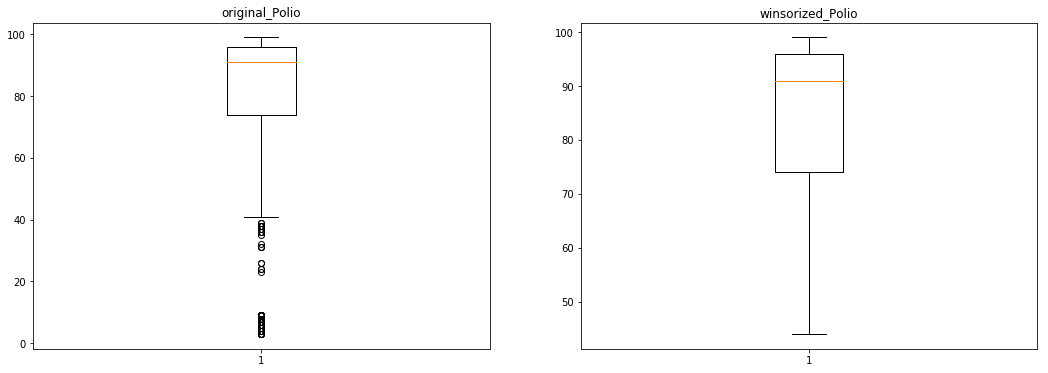

In [28]:
# Winsorize Polio
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Polio = le['Polio']
plt.boxplot(original_Polio)
plt.title("original_Polio")

plt.subplot(1,2,2)
winsorized_Polio = winsorize(le['Polio'],(0.09,0))
plt.boxplot(winsorized_Polio)
plt.title("winsorized_Polio")

plt.show()

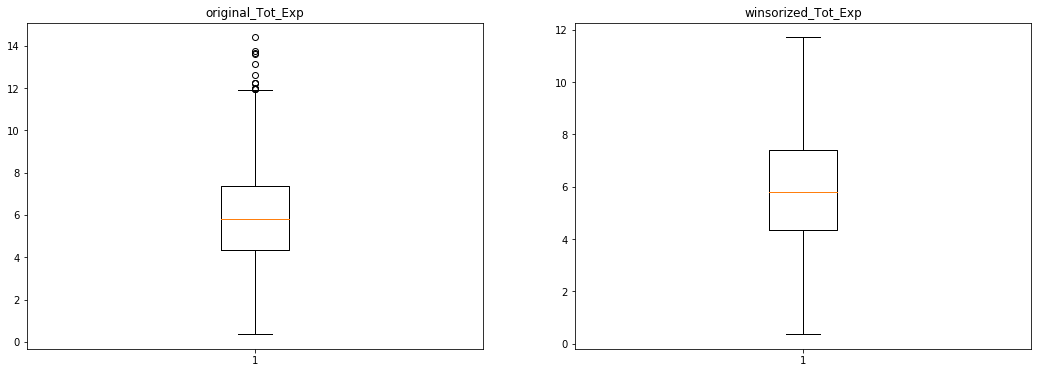

In [29]:
# Winsorize Tot_Exp
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Tot_Exp = le['Tot_Exp']
plt.boxplot(original_Tot_Exp)
plt.title("original_Tot_Exp")

plt.subplot(1,2,2)
winsorized_Tot_Exp = winsorize(le['Tot_Exp'],(0,0.01))
plt.boxplot(winsorized_Tot_Exp)
plt.title("winsorized_Tot_Exp")

plt.show()

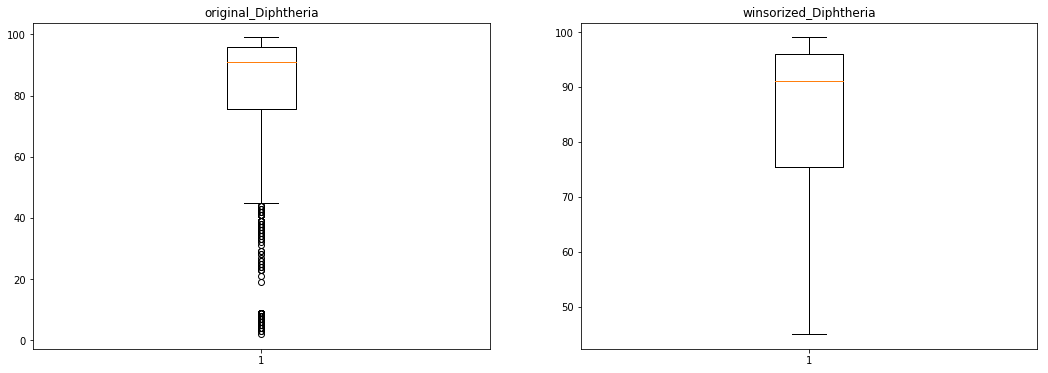

In [30]:
# Winsorize Diphtheria
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Diphtheria = le['Diphtheria']
plt.boxplot(original_Diphtheria)
plt.title("original_Diphtheria")

plt.subplot(1,2,2)
winsorized_Diphtheria = winsorize(le['Diphtheria'],(0.10,0))
plt.boxplot(winsorized_Diphtheria)
plt.title("winsorized_Diphtheria")

plt.show()

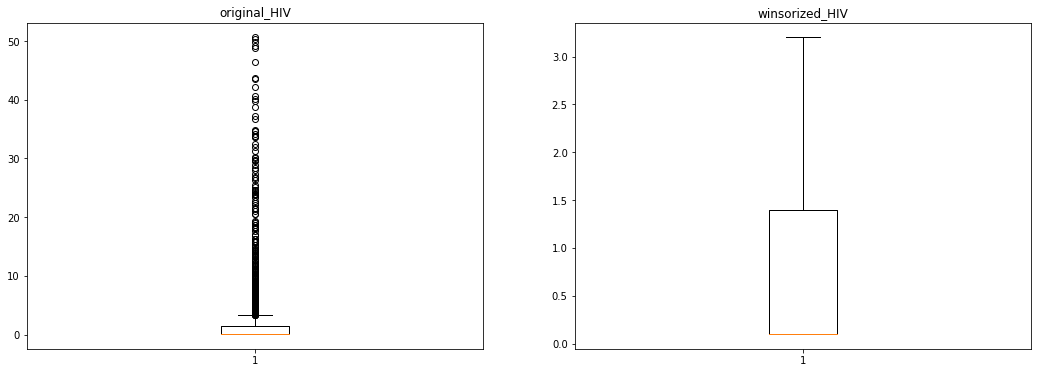

In [31]:
# Winsorize HIV/AIDS
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HIV = le['HIV/AIDS']
plt.boxplot(original_HIV)
plt.title("original_HIV")

plt.subplot(1,2,2)
winsorized_HIV = winsorize(le['HIV/AIDS'],(0,0.16))
plt.boxplot(winsorized_HIV)
plt.title("winsorized_HIV")

plt.show()

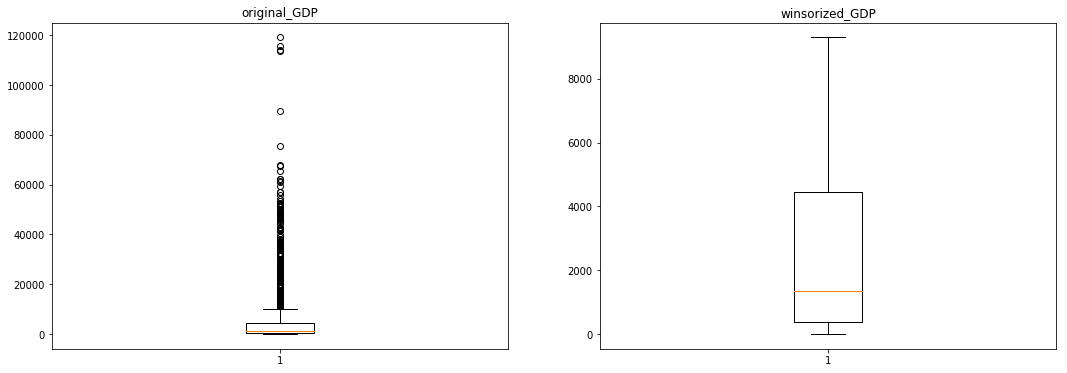

In [32]:
# Winsorize GDP
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_GDP = le['GDP']
plt.boxplot(original_GDP)
plt.title("original_GDP")

plt.subplot(1,2,2)
winsorized_GDP = winsorize(le['GDP'],(0,0.13))
plt.boxplot(winsorized_GDP)
plt.title("winsorized_GDP")

plt.show()

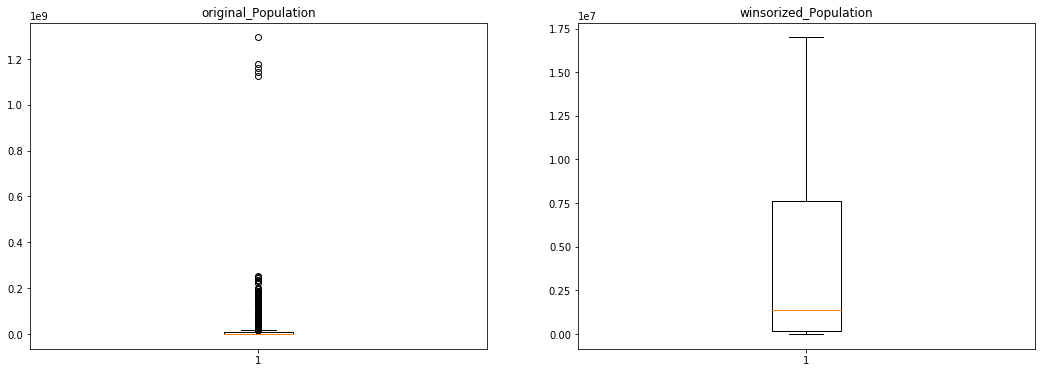

In [33]:
# Winsorize Population
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Population = le['Population']
plt.boxplot(original_Population)
plt.title("original_Population")

plt.subplot(1,2,2)
winsorized_Population = winsorize(le['Population'],(0,0.14))
plt.boxplot(winsorized_Population)
plt.title("winsorized_Population")

plt.show()

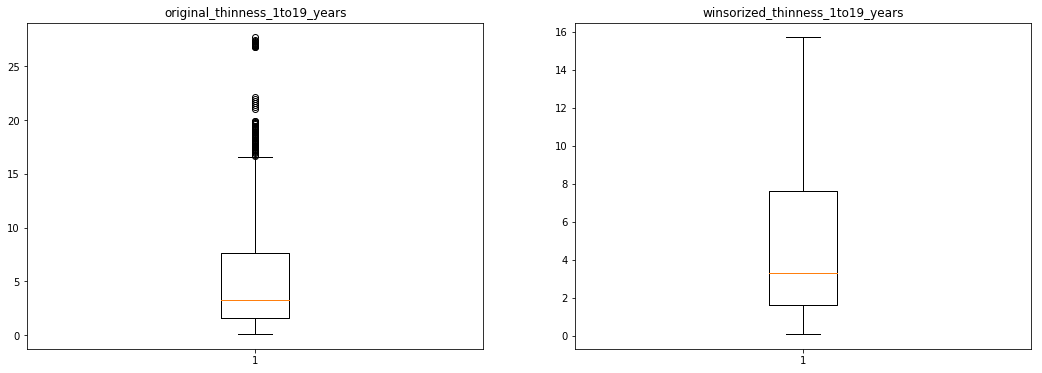

In [34]:
# Winsorize thinness_1to19_years
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_1to19_years = le['thinness_1to19_years']
plt.boxplot(original_thinness_1to19_years)
plt.title("original_thinness_1to19_years")

plt.subplot(1,2,2)
winsorized_thinness_1to19_years = winsorize(le['thinness_1to19_years'],(0,0.04))
plt.boxplot(winsorized_thinness_1to19_years)
plt.title("winsorized_thinness_1to19_years")

plt.show()

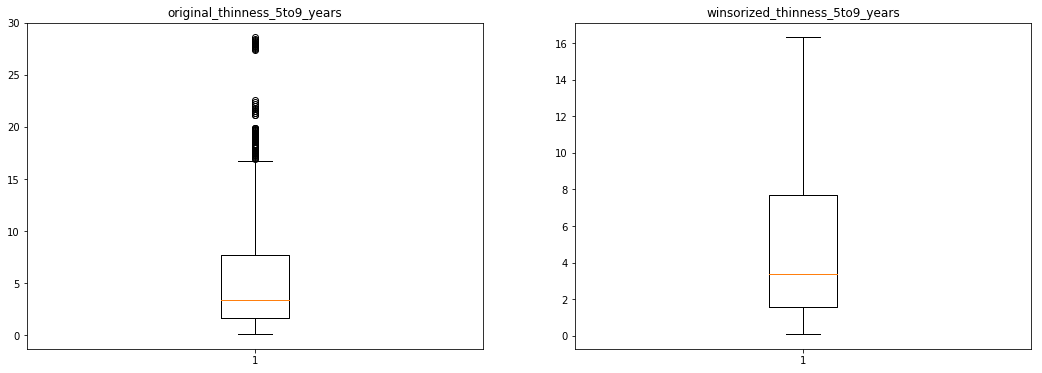

In [35]:
# Winsorize thinness_5to9_years
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_5to9_years = le['thinness_5to9_years']
plt.boxplot(original_thinness_5to9_years)
plt.title("original_thinness_5to9_years")

plt.subplot(1,2,2)
winsorized_thinness_5to9_years = winsorize(le['thinness_5to9_years'],(0,0.04))
plt.boxplot(winsorized_thinness_5to9_years)
plt.title("winsorized_thinness_5to9_years")

plt.show()

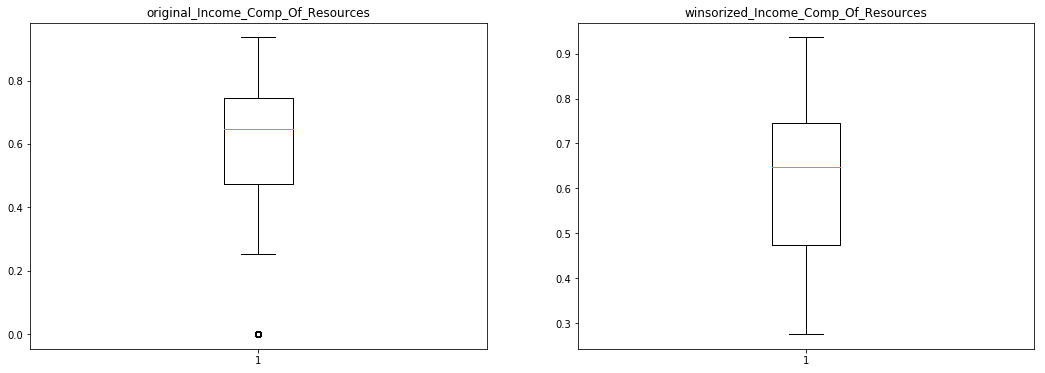

In [36]:
# Winsorize Income_Comp_Of_Resources
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Income_Comp_Of_Resources = le['Income_Comp_Of_Resources']
plt.boxplot(original_Income_Comp_Of_Resources)
plt.title("original_Income_Comp_Of_Resources")

plt.subplot(1,2,2)
winsorized_Income_Comp_Of_Resources = winsorize(le['Income_Comp_Of_Resources'],(0.05,0))
plt.boxplot(winsorized_Income_Comp_Of_Resources)
plt.title("winsorized_Income_Comp_Of_Resources")

plt.show()

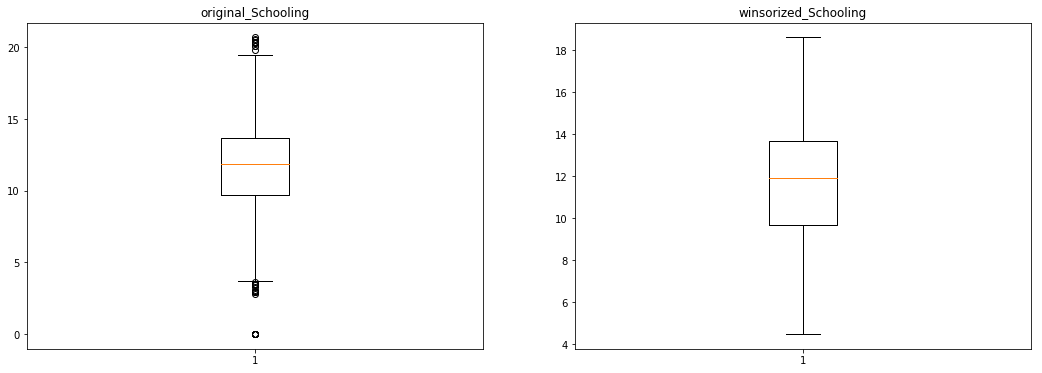

In [37]:
# Winsorize Schooling
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Schooling = le['Schooling']
plt.boxplot(original_Schooling)
plt.title("original_Schooling")

plt.subplot(1,2,2)
winsorized_Schooling = winsorize(le['Schooling'],(0.02,0.01))
plt.boxplot(winsorized_Schooling)
plt.title("winsorized_Schooling")

plt.show()

In [38]:
# Check number of Outliers after Winsorization for each variable.
win_list = [winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_Infant_Deaths,winsorized_Alcohol,
            winsorized_Percentage_Exp,winsorized_HepatitisB,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling]

for variable in win_list:
    q75, q25 = np.percentile(variable, [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    print("Number of outliers after winsorization : {}".format(len(np.where((variable > max_val) | (variable < min_val))[0])))
    
    

Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0


In [39]:
# Adding winsorized variables to the data frame.
le['winsorized_Life_Expectancy'] = winsorized_Life_Expectancy
le['winsorized_Adult_Mortality'] = winsorized_Adult_Mortality
le['winsorized_Infant_Deaths'] = winsorized_Infant_Deaths
le['winsorized_Alcohol'] = winsorized_Alcohol
le['winsorized_Percentage_Exp'] = winsorized_Percentage_Exp
le['winsorized_HepatitisB'] = winsorized_HepatitisB
#le['winsorized_Measles'] = winsorized_Measles
#le['log_transformed_Measles'] = log_transformed_Measles
le['winsorized_Under_Five_Deaths'] = winsorized_Under_Five_Deaths
le['winsorized_Polio'] = winsorized_Polio
le['winsorized_Tot_Exp'] = winsorized_Tot_Exp
le['winsorized_Diphtheria'] = winsorized_Diphtheria
le['winsorized_HIV'] = winsorized_HIV
le['winsorized_GDP'] = winsorized_GDP
le['winsorized_Population'] = winsorized_Population
le['winsorized_thinness_1to19_years'] = winsorized_thinness_1to19_years
le['winsorized_thinness_5to9_years'] = winsorized_thinness_5to9_years
le['winsorized_Income_Comp_Of_Resources'] = winsorized_Income_Comp_Of_Resources
le['winsorized_Schooling'] = winsorized_Schooling


<b>Exploratory Analysis:

In [40]:
# Descriptive statistics of continuous variables.
le.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,BMI,Under_Five_Deaths,Polio,...,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.00000,1987.000000,1987.000000,1987.000000,...,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000
mean,2006.984902,67.981782,175.187217,36.623553,4.455644,685.492318,73.86160,36.428636,50.932562,80.371917,...,82.957725,5.895471,83.225969,0.874082,2864.719760,4.799769e+06,4.955561,5.024006,0.616143,11.658581
std,4.323147,9.706401,131.616942,138.784913,3.976733,1761.669050,29.02807,19.736138,188.933117,24.363376,...,17.556131,2.266421,17.239348,1.183198,3186.069874,6.217060e+06,4.187776,4.265385,0.174584,3.102260
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.00000,1.400000,0.000000,3.000000,...,44.000000,0.370000,45.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.276000,4.500000
25%,2003.000000,61.700000,75.000000,1.000000,0.830000,29.469887,64.00000,18.150000,1.000000,74.000000,...,74.000000,4.360000,75.500000,0.100000,384.553107,1.967480e+05,1.600000,1.600000,0.473000,9.700000
50%,2007.000000,69.900000,153.000000,4.000000,3.770000,104.314473,86.00000,38.700000,4.000000,91.000000,...,91.000000,5.800000,91.000000,0.100000,1334.651896,1.396861e+06,3.300000,3.400000,0.648000,11.900000
75%,2011.000000,74.700000,243.000000,25.000000,7.190000,470.870122,95.00000,55.000000,36.000000,96.000000,...,96.000000,7.385000,96.000000,1.400000,4441.530655,7.625918e+06,7.600000,7.700000,0.745000,13.700000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,18961.348600,99.00000,77.100000,2500.000000,99.000000,...,99.000000,11.700000,99.000000,3.200000,9291.227619,1.699335e+07,15.700000,16.300000,0.936000,18.600000


<b>Univariate Analysis

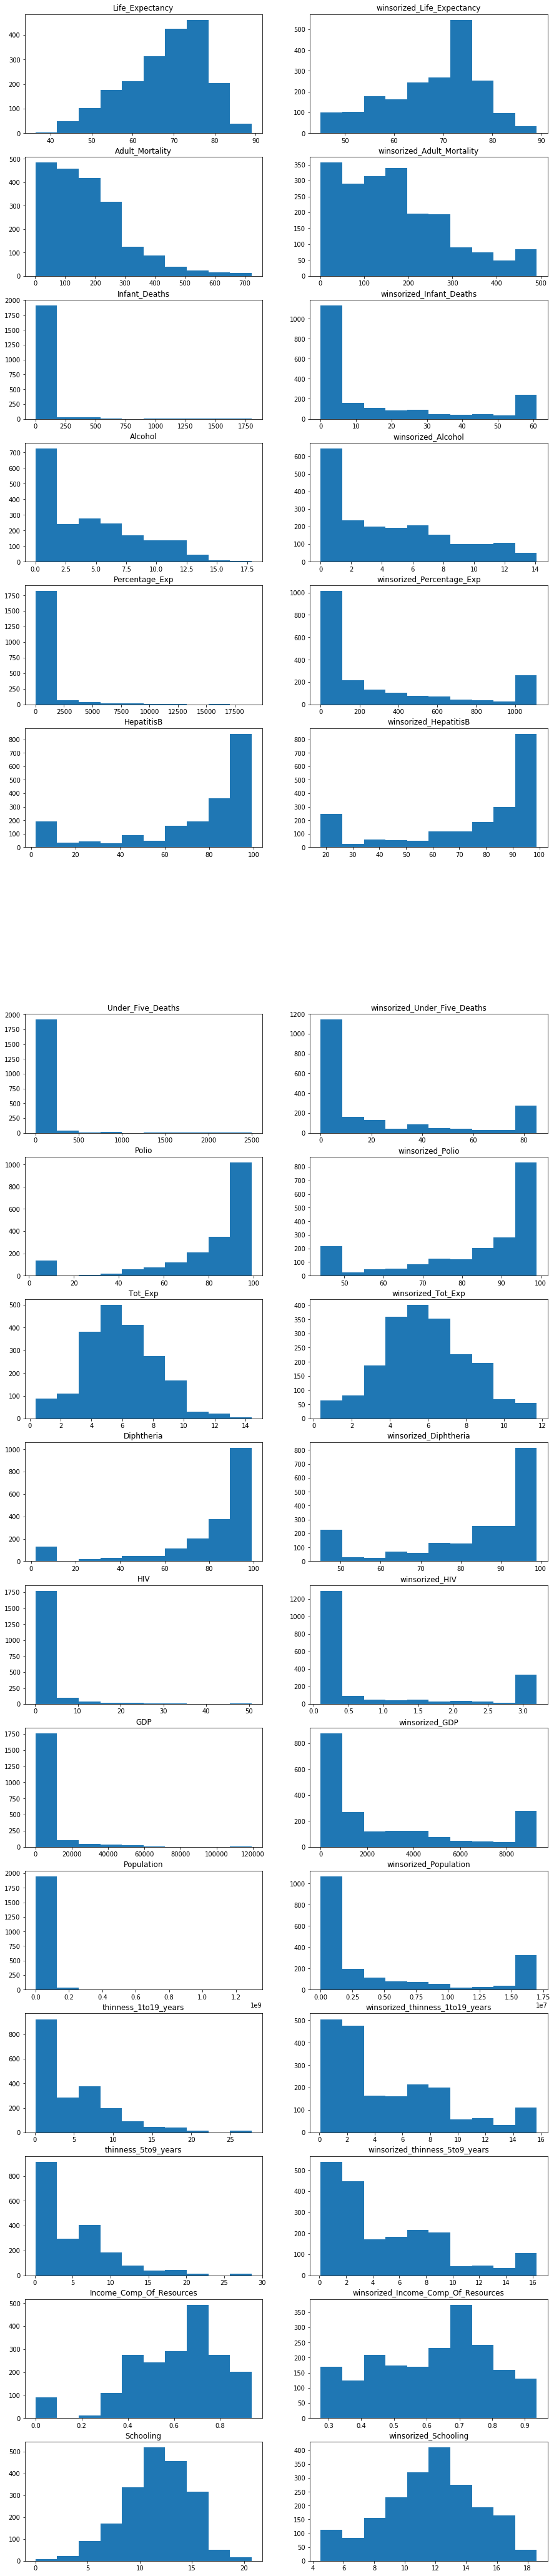

In [41]:
# Distribution of each numerical variable.
plt.figure(figsize=(15,75))

plt.subplot(18,2,1)
plt.hist(le.Life_Expectancy)
plt.title("Life_Expectancy")

plt.subplot(18,2,2)
plt.hist(le.winsorized_Life_Expectancy)
plt.title("winsorized_Life_Expectancy")

plt.subplot(18,2,3)
plt.hist(le.Adult_Mortality)
plt.title("Adult_Mortality")

plt.subplot(18,2,4)
plt.hist(le.winsorized_Adult_Mortality)
plt.title("winsorized_Adult_Mortality")

plt.subplot(18,2,5)
plt.hist(le.Infant_Deaths)
plt.title("Infant_Deaths")

plt.subplot(18,2,6)
plt.hist(le.winsorized_Infant_Deaths)
plt.title("winsorized_Infant_Deaths")

plt.subplot(18,2,7)
plt.hist(le.Alcohol)
plt.title("Alcohol")

plt.subplot(18,2,8)
plt.hist(le.winsorized_Alcohol)
plt.title("winsorized_Alcohol")

plt.subplot(18,2,9)
plt.hist(le.Percentage_Exp)
plt.title("Percentage_Exp")

plt.subplot(18,2,10)
plt.hist(le.winsorized_Percentage_Exp)
plt.title("winsorized_Percentage_Exp")

plt.subplot(18,2,11)
plt.hist(le.HepatitisB)
plt.title("HepatitisB")

plt.subplot(18,2,12)
plt.hist(le.winsorized_HepatitisB)
plt.title("winsorized_HepatitisB")

# plt.subplot(18,2,13)
# plt.hist(le.Country)
# plt.title("Country")

# plt.subplot(18,2,14)
# plt.hist(le.winsorized_Measles)
# plt.title("winsorized_Measles")

plt.subplot(18,2,15)
plt.hist(le.Under_Five_Deaths)
plt.title("Under_Five_Deaths")

plt.subplot(18,2,16)
plt.hist(le.winsorized_Under_Five_Deaths)
plt.title("winsorized_Under_Five_Deaths")
          
plt.subplot(18,2,17)
plt.hist(le.Polio)
plt.title("Polio")

plt.subplot(18,2,18)
plt.hist(le.winsorized_Polio)
plt.title("winsorized_Polio")

plt.subplot(18,2,19)
plt.hist(le.Tot_Exp)
plt.title("Tot_Exp")

plt.subplot(18,2,20)
plt.hist(le.winsorized_Tot_Exp)
plt.title("winsorized_Tot_Exp")

plt.subplot(18,2,21)
plt.hist(le.Diphtheria)
plt.title("Diphtheria")

plt.subplot(18,2,22)
plt.hist(le.winsorized_Diphtheria)
plt.title("winsorized_Diphtheria")

plt.subplot(18,2,23)
plt.hist(le['HIV/AIDS'])
plt.title("HIV")

plt.subplot(18,2,24)
plt.hist(le.winsorized_HIV)
plt.title("winsorized_HIV")

plt.subplot(18,2,25)
plt.hist(le.GDP)
plt.title("GDP")

plt.subplot(18,2,26)
plt.hist(le.winsorized_GDP)
plt.title("winsorized_GDP")

plt.subplot(18,2,27)
plt.hist(le.Population)
plt.title("Population")

plt.subplot(18,2,28)
plt.hist(le.winsorized_Population)
plt.title("winsorized_Population")

plt.subplot(18,2,29)
plt.hist(le.thinness_1to19_years)
plt.title("thinness_1to19_years")

plt.subplot(18,2,30)
plt.hist(le.winsorized_thinness_1to19_years)
plt.title("winsorized_thinness_1to19_years")

plt.subplot(18,2,31)
plt.hist(le.thinness_5to9_years)
plt.title("thinness_5to9_years")

plt.subplot(18,2,32)
plt.hist(le.winsorized_thinness_5to9_years)
plt.title("winsorized_thinness_5to9_years")

plt.subplot(18,2,33)
plt.hist(le.Income_Comp_Of_Resources)
plt.title("Income_Comp_Of_Resources")

plt.subplot(18,2,34)
plt.hist(le.winsorized_Income_Comp_Of_Resources)
plt.title("winsorized_Income_Comp_Of_Resources")

plt.subplot(18,2,35)
plt.hist(le.Schooling)
plt.title("Schooling")

plt.subplot(18,2,36)
plt.hist(le.winsorized_Schooling)
plt.title("winsorized_Schooling")

plt.show()

winsorized_Life_Expectancy, winsorized_Tot_Exp, winsorized_Schooling are some what normally distributed.

In [42]:
# Descriptive statistics of categorical variables.
le.describe(include=['O'])

,Country,Status
count,1987,1987
unique,133,2
top,Afghanistan,Developing
freq,16,1702


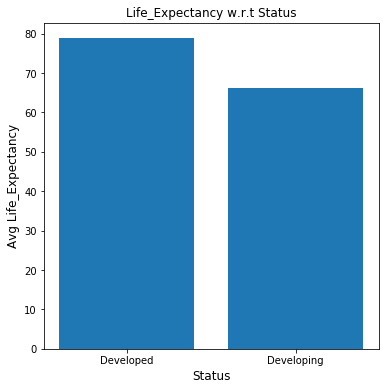

In [43]:
# Life_Expectancy w.r.t Status using bar plot.
plt.figure(figsize=(6,6))
plt.bar(le.groupby('Status')['Status'].count().index,le.groupby('Status')['winsorized_Life_Expectancy'].mean())
plt.xlabel("Status",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Status")
plt.show()

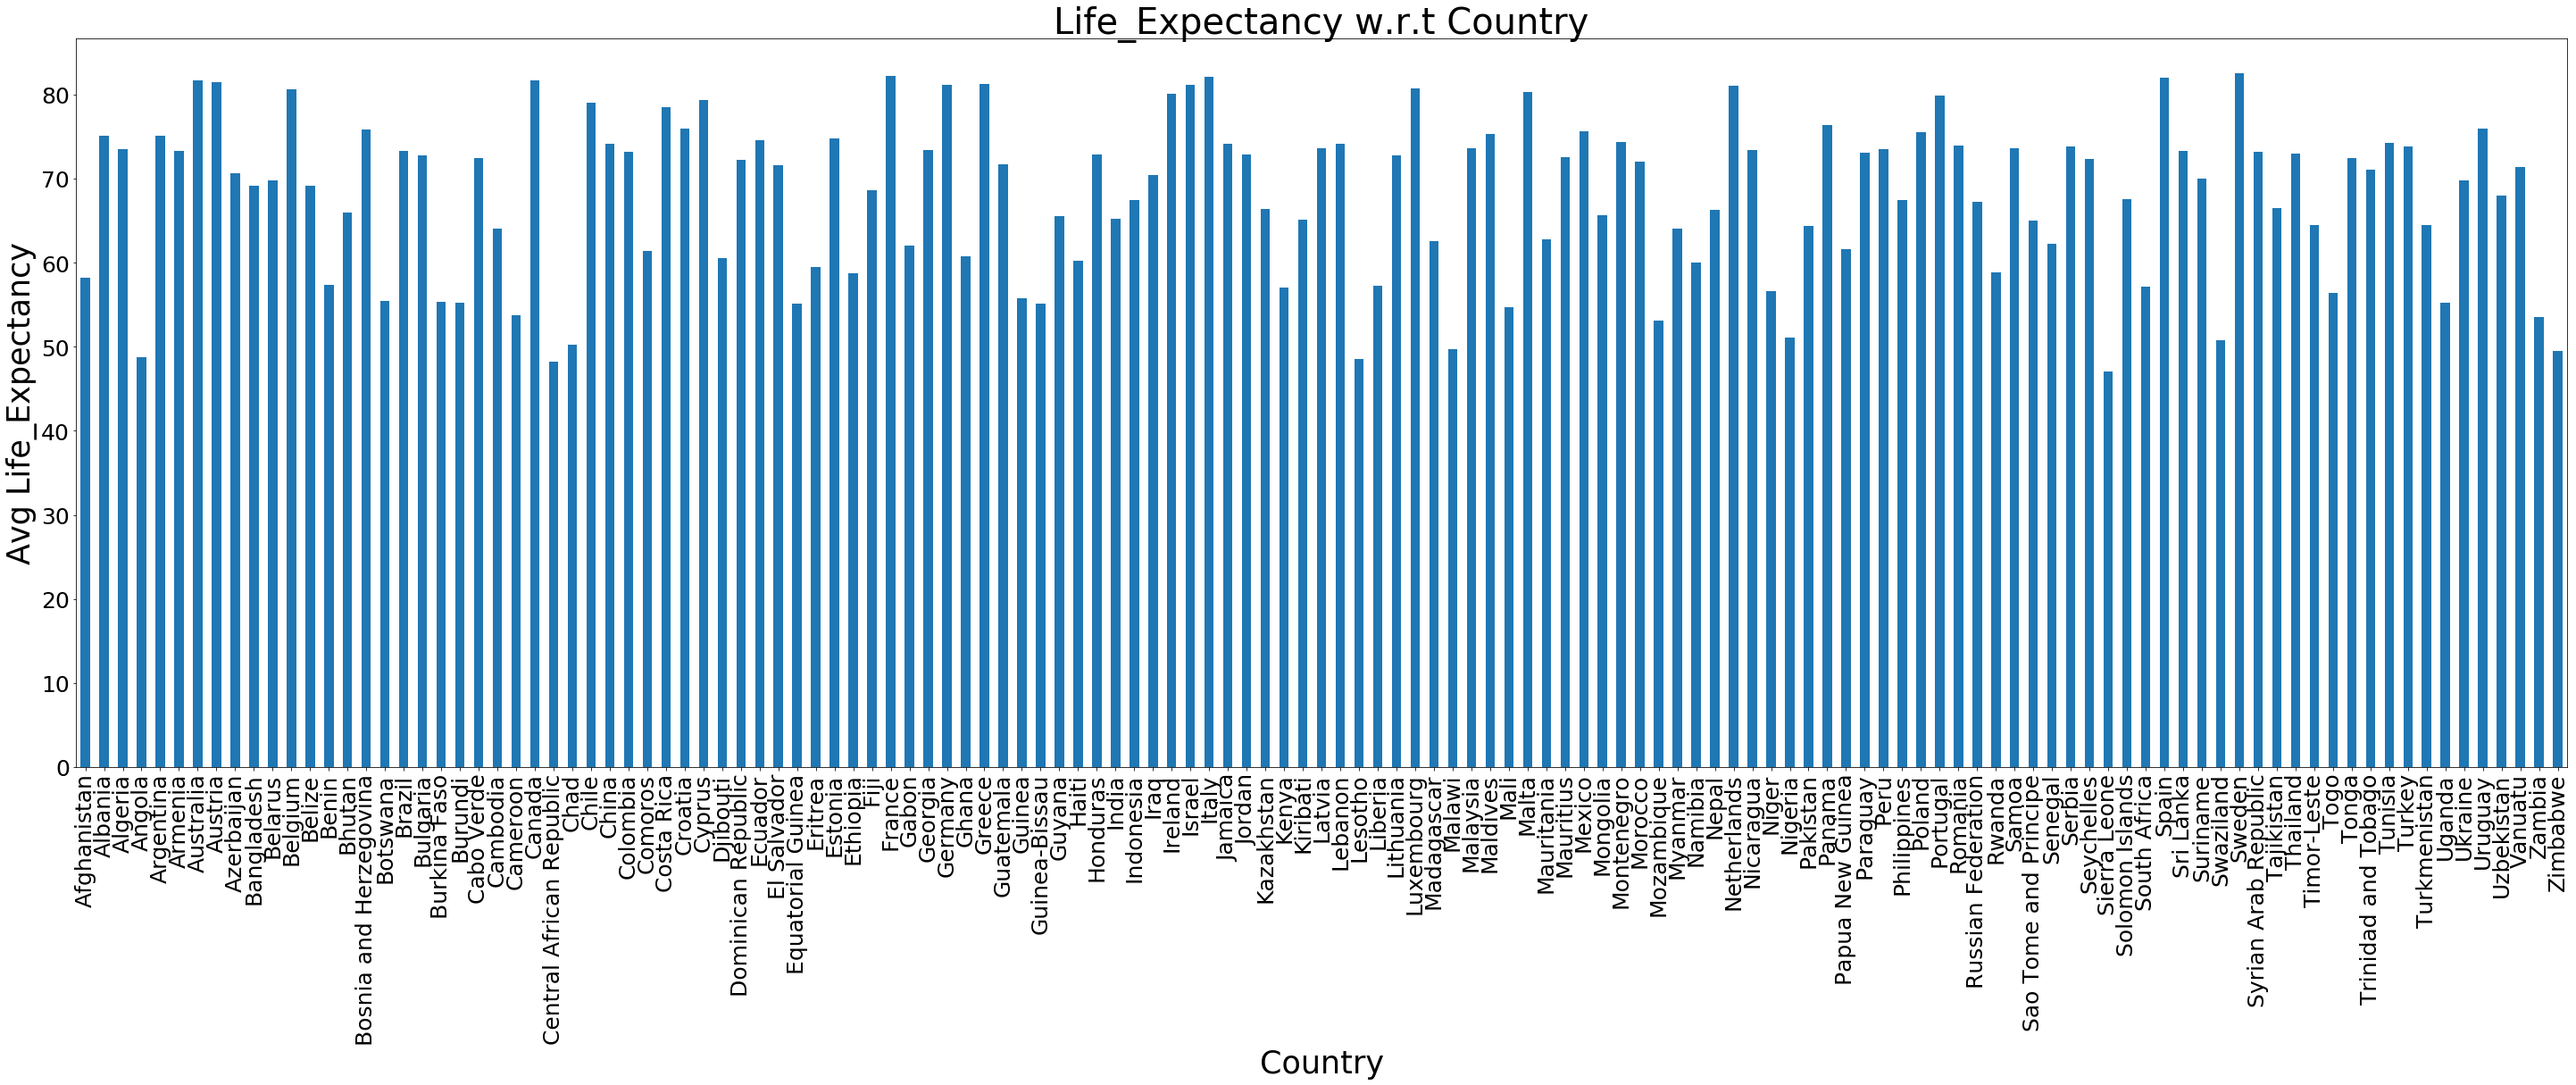

In [44]:
# Life_Expectancy w.r.t Country using bar plot.
le_country = le.groupby('Country')['winsorized_Life_Expectancy'].mean()
le_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Life_Expectancy w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Life_Expectancy",fontsize=35)
plt.show()

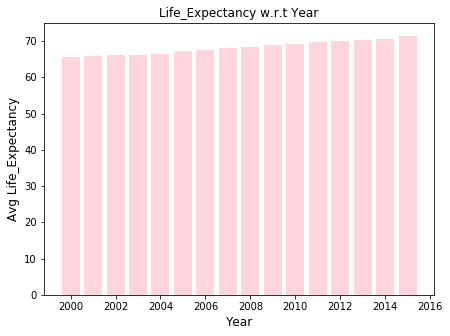

In [45]:
# Life_Expectancy w.r.t Year using bar plot.
plt.figure(figsize=(7,5))
plt.bar(le.groupby('Year')['Year'].count().index,le.groupby('Year')['winsorized_Life_Expectancy'].mean(),color='pink',alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Year")
plt.show()

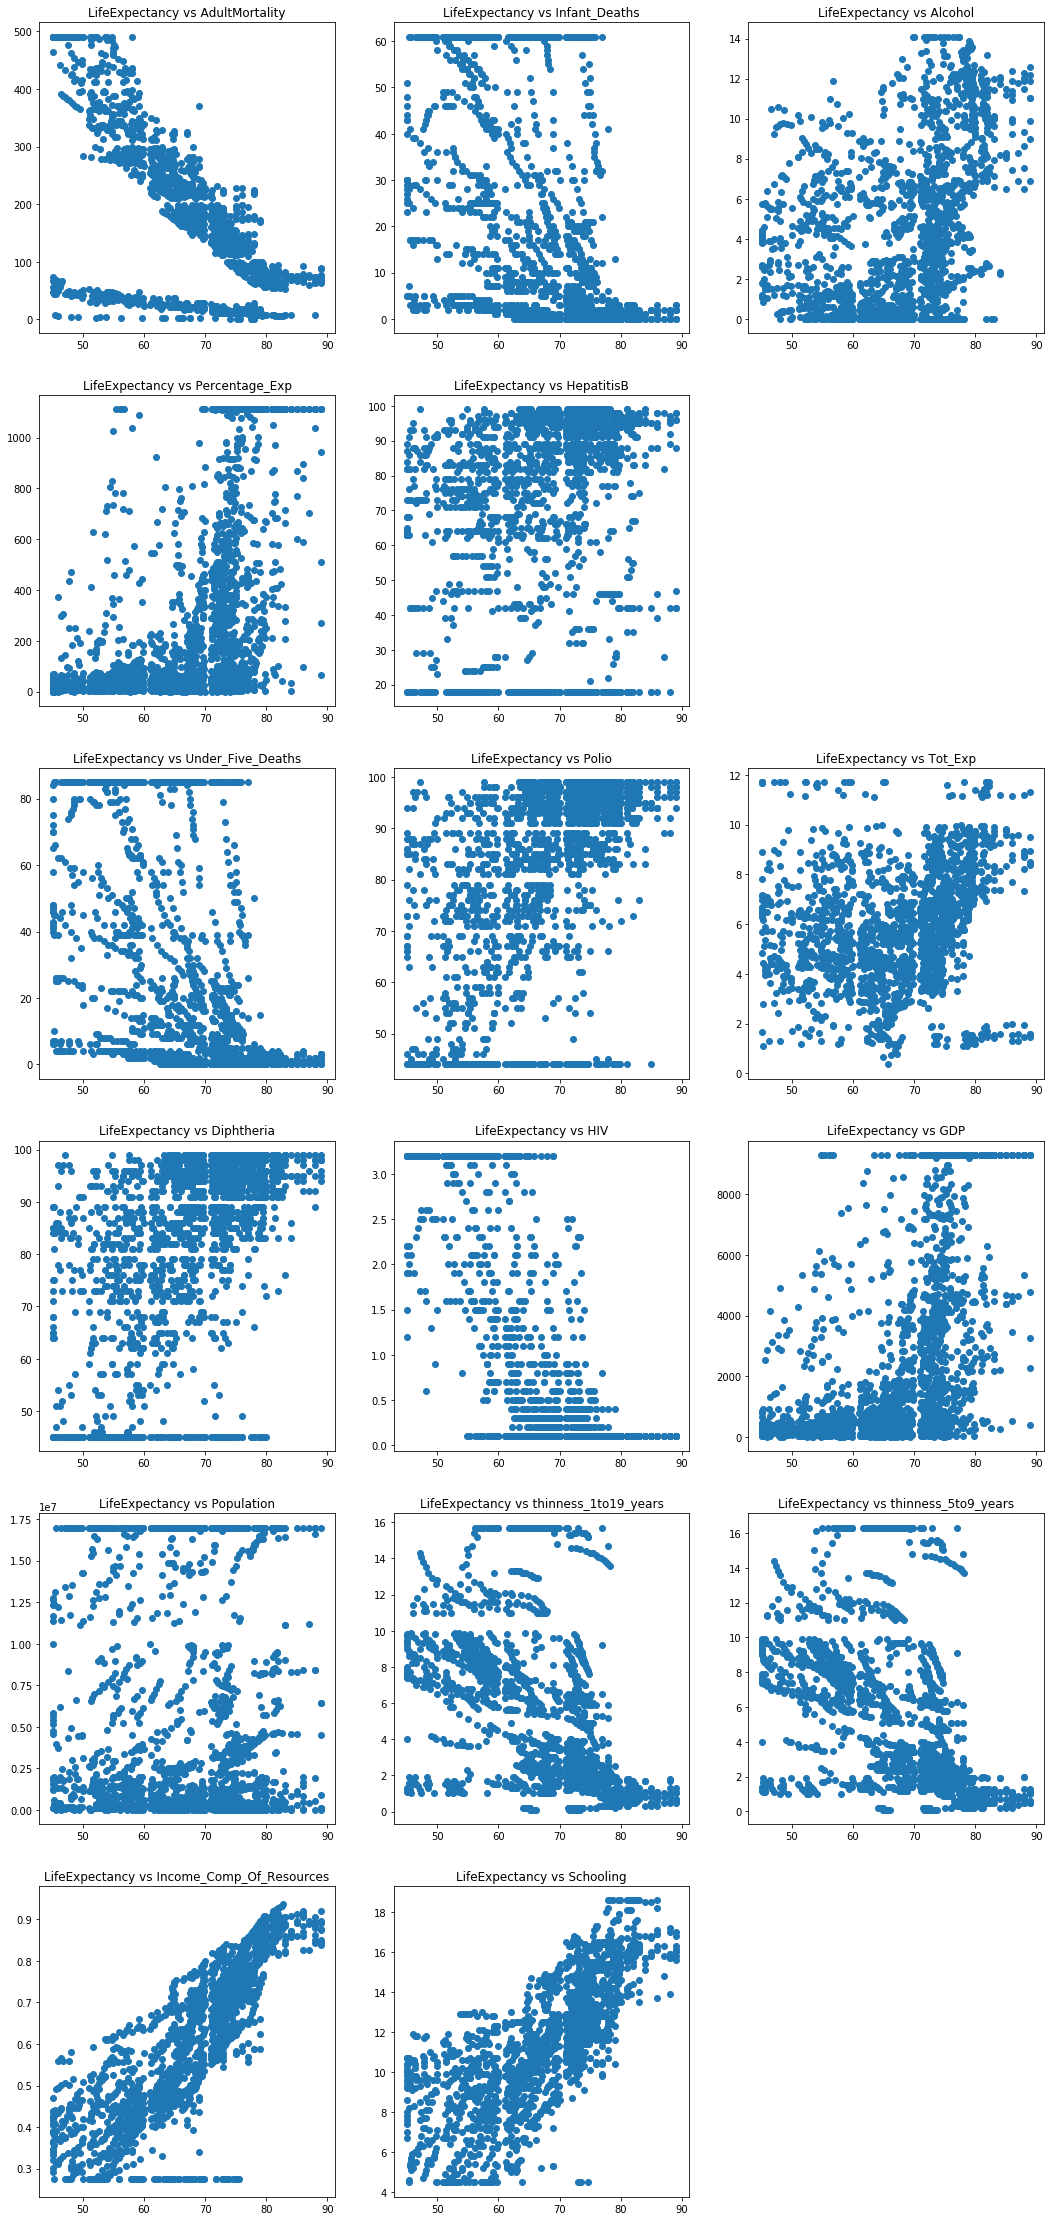

In [46]:
# Scatter plot between the target variable(winsorized_Life_Expectancy) and all continuous variables.
plt.figure(figsize=(18,40))

plt.subplot(6,3,1)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Adult_Mortality"])
plt.title("LifeExpectancy vs AdultMortality")

plt.subplot(6,3,2)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Infant_Deaths"])
plt.title("LifeExpectancy vs Infant_Deaths")

plt.subplot(6,3,3)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Alcohol"])
plt.title("LifeExpectancy vs Alcohol")

plt.subplot(6,3,4)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Percentage_Exp"])
plt.title("LifeExpectancy vs Percentage_Exp")

plt.subplot(6,3,5)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_HepatitisB"])
plt.title("LifeExpectancy vs HepatitisB")

# plt.subplot(6,3,6)
# plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Measles"])
# plt.title("LifeExpectancy vs Measles")

plt.subplot(6,3,7)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Under_Five_Deaths"])
plt.title("LifeExpectancy vs Under_Five_Deaths")

plt.subplot(6,3,8)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Polio"])
plt.title("LifeExpectancy vs Polio")

plt.subplot(6,3,9)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Tot_Exp"])
plt.title("LifeExpectancy vs Tot_Exp")

plt.subplot(6,3,10)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Diphtheria"])
plt.title("LifeExpectancy vs Diphtheria")

plt.subplot(6,3,11)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_HIV"])
plt.title("LifeExpectancy vs HIV")

plt.subplot(6,3,12)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_GDP"])
plt.title("LifeExpectancy vs GDP")

plt.subplot(6,3,13)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Population"])
plt.title("LifeExpectancy vs Population")

plt.subplot(6,3,14)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_thinness_1to19_years"])
plt.title("LifeExpectancy vs thinness_1to19_years")

plt.subplot(6,3,15)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_thinness_5to9_years"])
plt.title("LifeExpectancy vs thinness_5to9_years")

plt.subplot(6,3,16)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Income_Comp_Of_Resources"])
plt.title("LifeExpectancy vs Income_Comp_Of_Resources")

plt.subplot(6,3,17)
plt.scatter(le["winsorized_Life_Expectancy"], le["winsorized_Schooling"])
plt.title("LifeExpectancy vs Schooling")


plt.show()

<b>Observation:</b><br/>
Life_Expectancy has somewhat Negative relationship with AdultMortality.<br/>
Life_Expectancy has positive relationship with Income_Comp_Of_Resources and Schooling.

Let us observe if there exists any correlation among the variables that are related to the target variable(winsorized_Life_Expectancy).

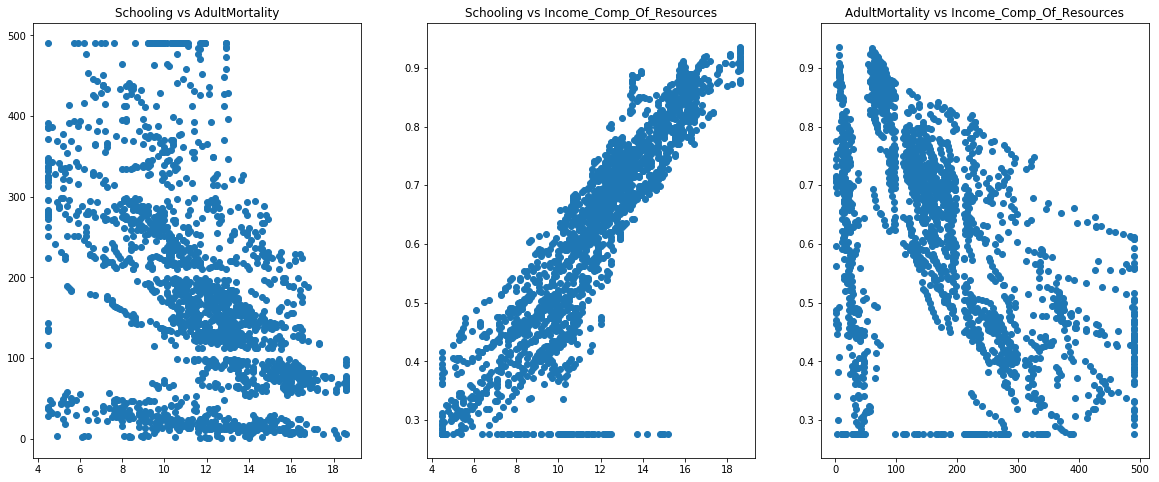

In [47]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.scatter(le["winsorized_Schooling"], le["winsorized_Adult_Mortality"])
plt.title("Schooling vs AdultMortality")

plt.subplot(1,3,2)
plt.scatter(le["winsorized_Schooling"], le["winsorized_Income_Comp_Of_Resources"])
plt.title("Schooling vs Income_Comp_Of_Resources")

plt.subplot(1,3,3)
plt.scatter(le["winsorized_Adult_Mortality"], le["winsorized_Income_Comp_Of_Resources"])
plt.title("AdultMortality vs Income_Comp_Of_Resources")

plt.show()

Looks like all these variables have inter-relation. Let us confirm this using correlation heatmap.

In [48]:
# Correlation of winsorized variables
le_win = le.iloc[:,21:]
le_win['Country'] = le['Country']
le_win['Year'] = le['Year']
le_win['Status'] = le['Status']
le_win_num = le_win.iloc[:,:-3]
cormat = le_win_num.corr()
le_win_num.head()

,winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_Infant_Deaths,winsorized_Alcohol,winsorized_Percentage_Exp,winsorized_HepatitisB,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling
0,65.0,263.0,61,0.01,71.279624,65.0,83,44.0,8.16,65.0,0.1,584.259210,16993354.0,15.7,16.3,0.479,10.1
1,59.9,271.0,61,0.01,73.523582,62.0,85,58.0,8.18,62.0,0.1,612.696514,327582.0,15.7,16.3,0.476,10.0
2,59.9,268.0,61,0.01,73.219243,64.0,85,62.0,8.13,64.0,0.1,631.744976,16993354.0,15.7,16.3,0.470,9.9
3,59.5,272.0,61,0.01,78.184215,67.0,85,67.0,8.52,67.0,0.1,669.959000,3696958.0,15.7,16.3,0.463,9.8
4,59.2,275.0,61,0.01,7.097109,68.0,85,68.0,7.87,68.0,0.1,63.537231,2978599.0,15.7,16.3,0.454,9.5


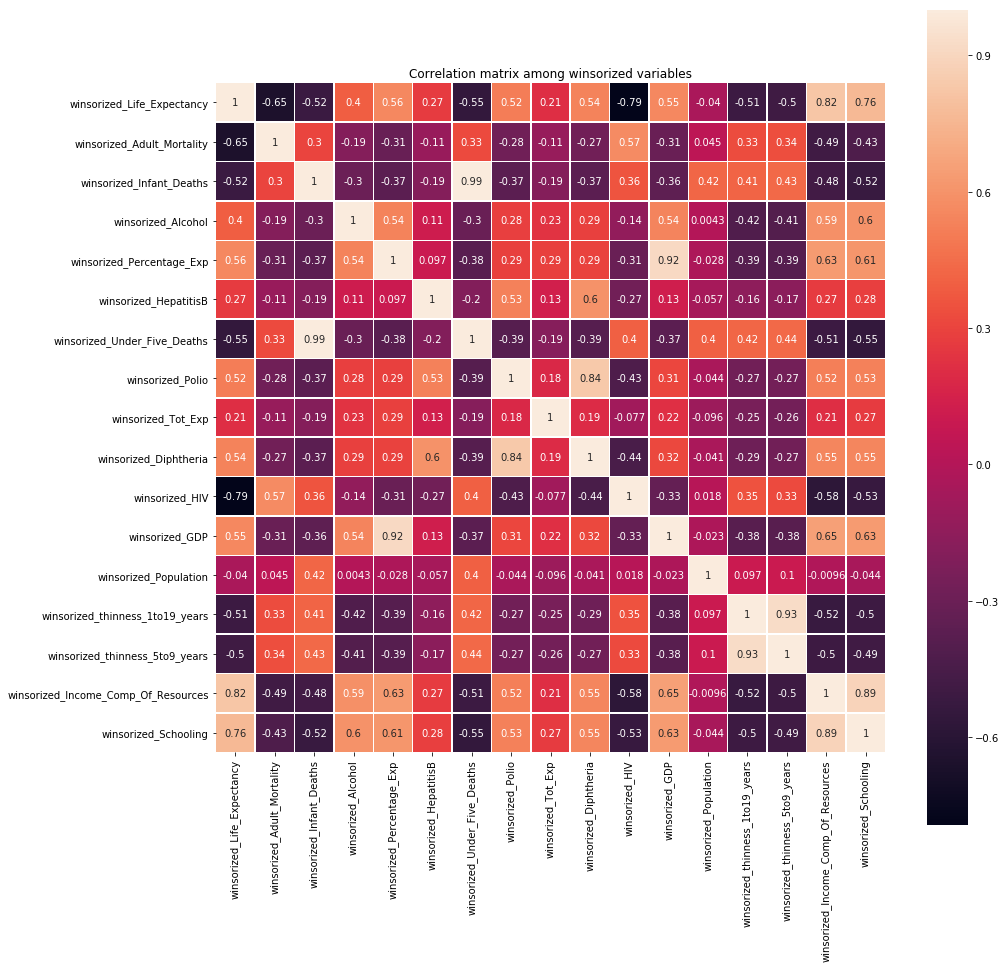

In [49]:
# Using heatmap to observe correlations.
import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(cormat, square=True, annot=True, linewidths=.5)
plt.title("Correlation matrix among winsorized variables")
plt.show()

<b>Observations:</b><br/>
- winsorized_Income_Comp_Of_Resources is correlated with winsorized_Schooling. <br/>
- winsorized_thinness_1to19_years and winsorized_thinness_5to9_years are correlated. <br/>
- winsorized_Polio and winsorized_Diphtheria are correlated. <br/>
- winsorized_Percentage_Exp and winsorized_GDP are correlated. <br/>
- winsorized_Income_Comp_Of_Resources and <b>winsorized_Life_Expectancy</b> are correlated. <br/>
- <b>winsorized_Life_Expectancy</b> and winsorized_Schooling are correlated. <br/>
- winsorized_Infant_Deaths and winsorized_Under_Five_Deaths are correlated. <br/>
- winsorized_HIV has negative relation with <b>winsorized_Life_Expectancy</b>. <br/>
- winsorized_Adult_Mortality has negative relation with <b>winsorized_Life_Expectancy</b>. <br/>

<b>Feature engineering:

In [50]:
round(le[['Status','Life_Expectancy']].groupby(['Status']).mean(),2)

,Life_Expectancy
Status,
Developed,78.83
Developing,66.16


From the above, developed countries have higher average Life_Expectancy compared to Developing.<br/>
Let us find out statistically if this difference is significant.

In [51]:
# Finding the significance of difference of Average_Life_Expectancy between Developed and Developing countries using 
# t-test
import scipy.stats as stats
stats.ttest_ind(le.loc[le['Status']=='Developed','Life_Expectancy'],le.loc[le['Status']=='Developing','Life_Expectancy'])

Ttest_indResult(statistic=22.92439377113489, pvalue=2.2504696584331004e-103)

p value is < 0.05<br/>
Hence, the difference of Average_Life_Expectancy between Developed and Developing countries is significant. We can consider 'Status' as a feature as it is related to Life Expectancy.

Let us create a new data frame with feature columns correlated to Life_Expectancy. As per the correlation heatmap, it<br/> is clear that the following fields are correlated with winsorized_Life_Expectancy.<br/>

- winsorized_Schooling<br/>
- winsorized_Income_Comp_Of_Resources<br/>
- winsorized_HIV<br/>
- winsorized_Adult_Mortality<br/>

Also it is to be noticed that winsorized_Income_Comp_Of_Resources is correlated with winsorized_Schooling.<br/>
All the features should NOT be inter related and hence let us eliminate one of these based on the correlation<br/> value w.r.t winsorized_Life_Expectancy.<br/>

- winsorized_Income_Comp_Of_Resources corr with winsorized_Life_Expectancy = 0.82<br/>
- winsorized_Schooling corr with winsorized_Life_Expectancy = 0.76<br/>

Let us eliminate winsorized_Schooling as it has relatively low correlation factor. Also, we can choose 'Status' as an important feature based on the above analysis.

In [52]:
# Create a data frame with features.
feature_df = le[['Status','winsorized_Life_Expectancy','winsorized_Income_Comp_Of_Resources','winsorized_HIV','winsorized_Adult_Mortality']]


In [53]:
# Convert categorical values to numerical values using one-hot encoding for 'Status' feature.
feature_df = pd.concat([feature_df,pd.get_dummies(feature_df['Status'],drop_first=True)],axis=1)
feature_df.head()

,Status,winsorized_Life_Expectancy,winsorized_Income_Comp_Of_Resources,winsorized_HIV,winsorized_Adult_Mortality,Developing
0,Developing,65.0,0.479,0.1,263.0,1
1,Developing,59.9,0.476,0.1,271.0,1
2,Developing,59.9,0.470,0.1,268.0,1
3,Developing,59.5,0.463,0.1,272.0,1
4,Developing,59.2,0.454,0.1,275.0,1


Many machine learning models assume the target variable to be normally distributed. If normality is an assumption non-normal variables can be transformed into normally distributed features using transformations such as taking the square root, the inverse, or the log of the variable, or by applying the Box-Cox transformation.

Also, many machine learning models assume that all features have values in the same range (all features have a min of 0 and max of 1, for example) or they exhibit normal statistical properties. For some techniques, features that vary in range can result in incorrect estimates and results. To be able to apply these techniques and methods, we need to rescale our variables to fit a limited range, or standardize our variables to exhibit some regular statistical patterns. In this case, we can use two concepts of rescaling: <b>normalization</b> and <b>standardization</b>.